# Holt-Winters exponential smoothing forecaster

`pip install statsmodels`

In [20]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.naive import NaiveForecaster
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error

In [21]:
from aeon.forecasting.exp_smoothing import ExponentialSmoothing

In [22]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train

0.0511419028267833

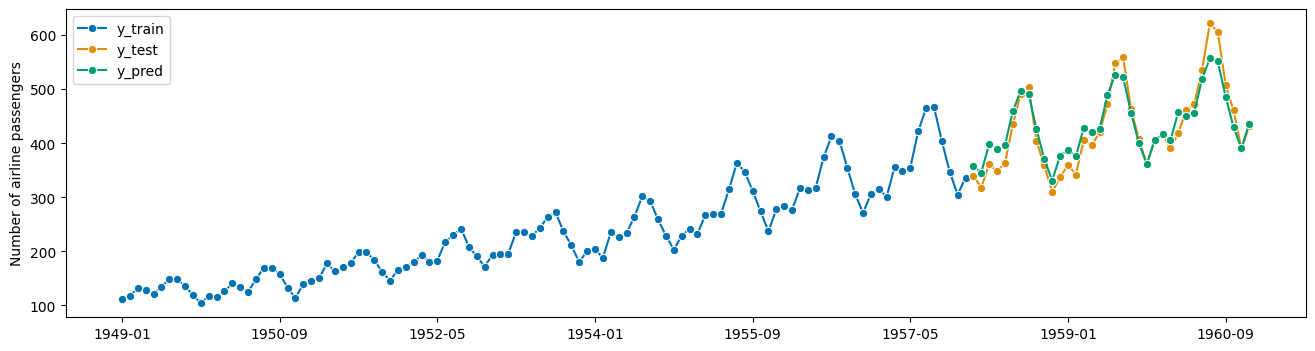

In [23]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
fh = np.arange(len(y_test)) + 1
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

# ETS Model

0.06186354612548242

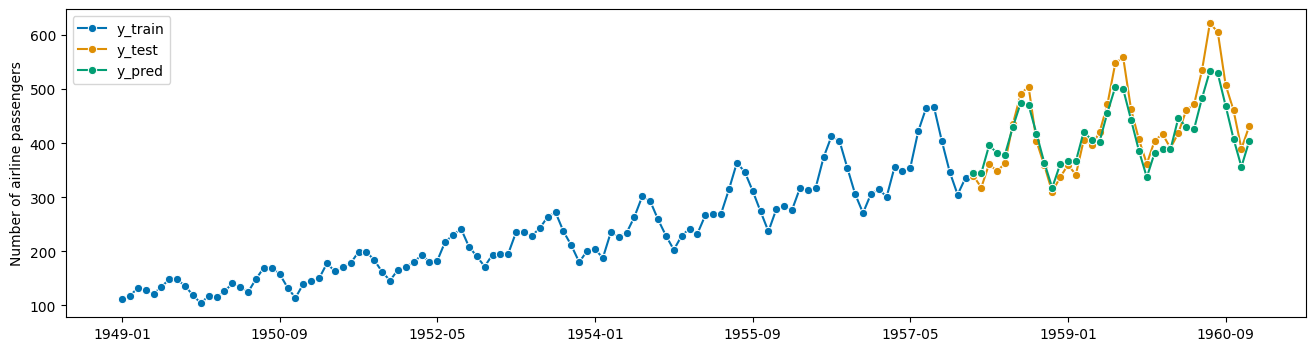

In [24]:
from aeon.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

# Theta Model

0.08174636612807698

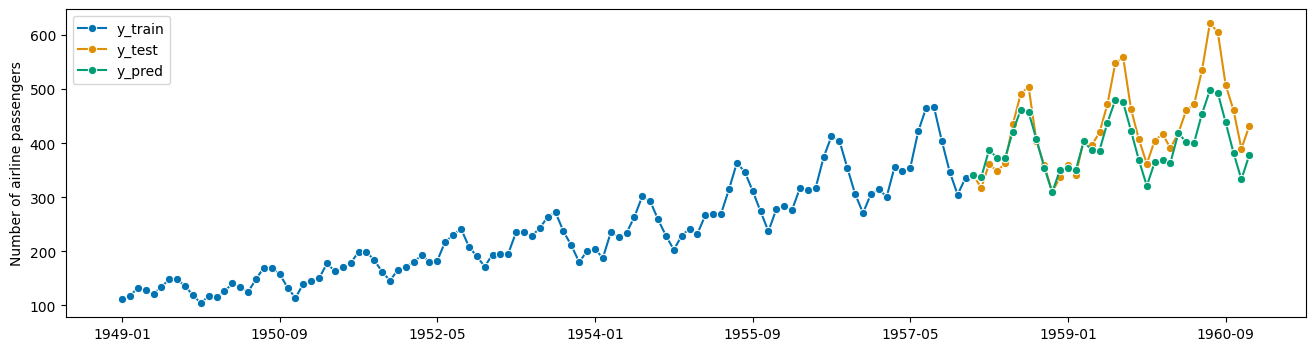

In [27]:
from aeon.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)  
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)